<a href="https://colab.research.google.com/github/ConradBitt/repositorio_monografia/blob/main/Lorenz_System_para_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do Notebook
Este notebook foi escrito por [Conrado F. Bittencourt](github.com/conradBitt) com o objetivo de calcular as trajetórias no espaço de fase do modelo de lorenz apresentado no artigo [*Deterministic nonperiod flow*](https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml).

#Importações

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
plt.style.use('classic')

# Iterando o Sistema de Lorenz

In [ ]:
#coeficientes de lorenz
sigma = 10
rho = 28
beta = 8/3

#derivadas das equações de lorenz
def fx(t,x,y):
    #x' = sigma (y - x)
    return sigma*(y - x)

def fy(t,x,y,z):
    #y' = x(rho - z ) - y
    return x*(rho - z) - y

def fz(t,x,y,z):
    # z' = x*y - beta*z
    return x*y - beta*z

#tamanho e número de passos
N = 200000
h = 0.0001


#cria um vetor com os resultados
t = np.empty(N,dtype=np.float64)
x = np.copy(t)
y = np.copy(t)
z = np.copy(t)

#Condições iniciais
t[0] = 0.0
x[0] = 1.0
y[0] = 1.0
z[0] = 1.0

#iterações no método de Euler
for i in range(0,N-1):
    t[i + 1] = t[i] + h
    x[i + 1] = x[i] + h * fx(t[i],x[i],y[i])
    y[i + 1] = y[i] + h * fy(t[i], x[i], y[i],z[i])
    z[i + 1] = z[i] + h * fz(t[i], x[i], y[i],z[i])

    #print("{}º Tempo: {},       posição X:{},       posição Y:{},   posição Z:{}"
    #      .format(i+1,round(t[i], 6), round(x[i], 11), round(y[i],11), round(z[i],11)))
    
#cria um vetor com os resultados
t1 = np.empty(N,dtype=np.float64)
x1 = np.copy(t)
y1 = np.copy(t)
z1 = np.copy(t)

#Condições iniciais
t1[0] = 0.0000
x1[0] = 1.0005
y1[0] = 1.0000
z1[0] = 1.0000

#iterações no método de Euler
for i in range(0,N-1):
    t1[i + 1] = t1[i] + h
    x1[i + 1] = x1[i] + h * fx(t1[i], x1[i], y1[i])
    y1[i + 1] = y1[i] + h * fy(t1[i], x1[i], y1[i],z1[i])
    z1[i + 1] = z1[i] + h * fz(t1[i], x1[i], y1[i],z1[i])

    #print("{}º Tempo: {},       posição X:{},       posição Y:{},   posição Z:{}"
    #.format(i+1,round(t1[i], 6), round(x1[i], 11), round(y1[i],11), round(z1[i],11)))


# Exibindo a figura

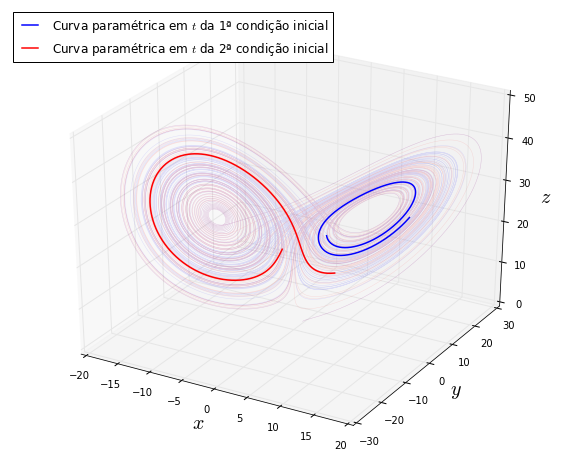

In [ ]:
k = 1000

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.plot(x, y, z,alpha=0.1, linewidth=0.5, color='blue')
ax.plot(x1, y1, z1,alpha=0.1, linewidth=0.5, color='red')
ax.plot(x[-k:], y[-k:], z[-k:], label='Curva paramétrica em $t$ da 1ª condição inicial', linewidth=1.5, color='blue')
ax.plot(x1[-k:], y1[-k:], z1[-k:], label='Curva paramétrica em $t$ da 2ª condição inicial', linewidth=1.5, color='red')
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)
ax.set_zlabel('$z$', fontsize=20)
ax.legend(loc='upper left')

plt.show()